## Anotaciones

* _holiday_ incluye a _shops closed_
* trabajar con la fecha
* Ver los fin de semanas
* Cuantos días pasaron desde el ultimo feriado y cuanto falta para el siguiente (?)
* Ver outliers en los feriados (o en los días)
* Maximos y minimos en los user_activities
* Diferenciar por pais

## Carga de librerías

In [115]:
%pip install lightgbm
%pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [116]:
#Agregamos librerias a utilizar
import pandas as pd
import xgboost as xgb
# import sklearn as sk
import numpy as np
from datetime import datetime

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#modelos y métricas
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split
from keras.models import Sequential
from keras.layers import Dense

import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.ensemble import StackingRegressor,RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
pd.set_option('display.max_columns', 40)

# import warnings
# warnings.simplefilter("ignore")

## Visualización de datos

In [117]:
# Generamos un dataframe del dataset de entrenamiento
df =  pd.read_csv('train.csv')
df

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.80,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.50,0.0,1704.0,32410.0,Prague_1_2020-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,Budapest_1,2024-03-10,6733.0,NaN,0,0,0,0,0,0,0,0.0,0,1.51,0.0,2983.0,27111.0,Budapest_1_2024-03-10
7336,Budapest_1,2024-03-11,6492.0,NaN,0,0,0,0,0,0,0,0.0,0,1.03,0.0,2975.0,27133.0,Budapest_1_2024-03-11
7337,Budapest_1,2024-03-12,6661.0,NaN,0,0,0,0,0,0,0,0.0,0,0.21,0.0,2974.0,27151.0,Budapest_1_2024-03-12
7338,Budapest_1,2024-03-13,6843.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,2979.0,27180.0,Budapest_1_2024-03-13


In [118]:
df.warehouse.value_counts()

warehouse
Prague_1       1193
Brno_1         1193
Prague_2       1193
Prague_3       1193
Budapest_1     1154
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

### Primeros vistazos al dataset original

In [119]:
print(f"El maximo de numero de ordenes en un dia es: {df.orders.max()}")

El maximo de numero de ordenes en un dia es: 18139.0


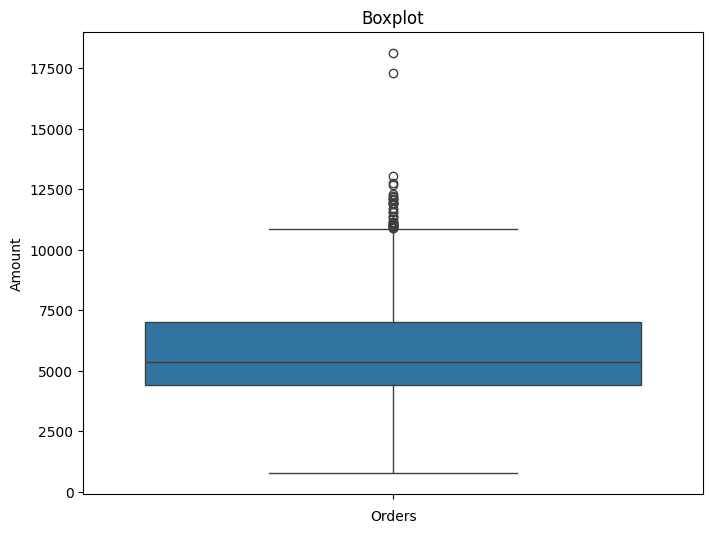

In [120]:
# Boxplot de la cantidad de apariciones de cada numero de ordenes por dia

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

In [121]:
df.count()

warehouse                 7340
date                      7340
orders                    7340
holiday_name               218
holiday                   7340
shutdown                  7340
mini_shutdown             7340
shops_closed              7340
winter_school_holidays    7340
school_holidays           7340
blackout                  7340
mov_change                7340
frankfurt_shutdown        7340
precipitation             7070
snow                      7070
user_activity_1           7340
user_activity_2           7340
id                        7340
dtype: int64

In [122]:
df.warehouse.value_counts()

warehouse
Prague_1       1193
Brno_1         1193
Prague_2       1193
Prague_3       1193
Budapest_1     1154
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

In [123]:
df.shops_closed.value_counts()

shops_closed
0    7260
1      80
Name: count, dtype: int64

In [124]:
df[df.warehouse == 'Frankfurt_1'].count()

warehouse                 629
date                      629
orders                    629
holiday_name                6
holiday                   629
shutdown                  629
mini_shutdown             629
shops_closed              629
winter_school_holidays    629
school_holidays           629
blackout                  629
mov_change                629
frankfurt_shutdown        629
precipitation             626
snow                      626
user_activity_1           629
user_activity_2           629
id                        629
dtype: int64

In [125]:
df.frankfurt_shutdown.value_counts()

frankfurt_shutdown
0    7338
1       2
Name: count, dtype: int64

Podemos ver que de las 7340 muestras que tenemos disponibles, solo dos tienen positivo en la columna frankfurt_shutdown, lo que significa que muy posiblemente no tenga relevancia en la variable target y que sera de poca utilidad para el entrenamiento de los modelos predictores.

### Visualizaciones de variaciones del dataset

Para poder obtener mayor información -más precisa y más útil- respecto de los datos disponibles debemos hacer modificaciones al dataset que nos permitan estudiarlo mejor.

#### Dataset limpio (para testear)

La primera modificación tiene que ver con las variables que no se encuentran en el dataset de test. Estas hay que quitarlas para así entrenar modelos con únicamente con las mismas variables que luego se encuentren en el dataset de test. Entonces usaremos este nuevo datagram para visualizar datos y para entrenar a los modelos.

In [126]:
df_clean = df.drop(columns=["shutdown", "mini_shutdown", "frankfurt_shutdown", "precipitation", "snow", "user_activity_1", "user_activity_2", "blackout", "mov_change", "id"])
df_clean.head(5)

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0


Mostramos la correlacion entre las variables numericas y el numero de ordenes por día y sucursal. Para eso debemos quitar todas las variables no númericas

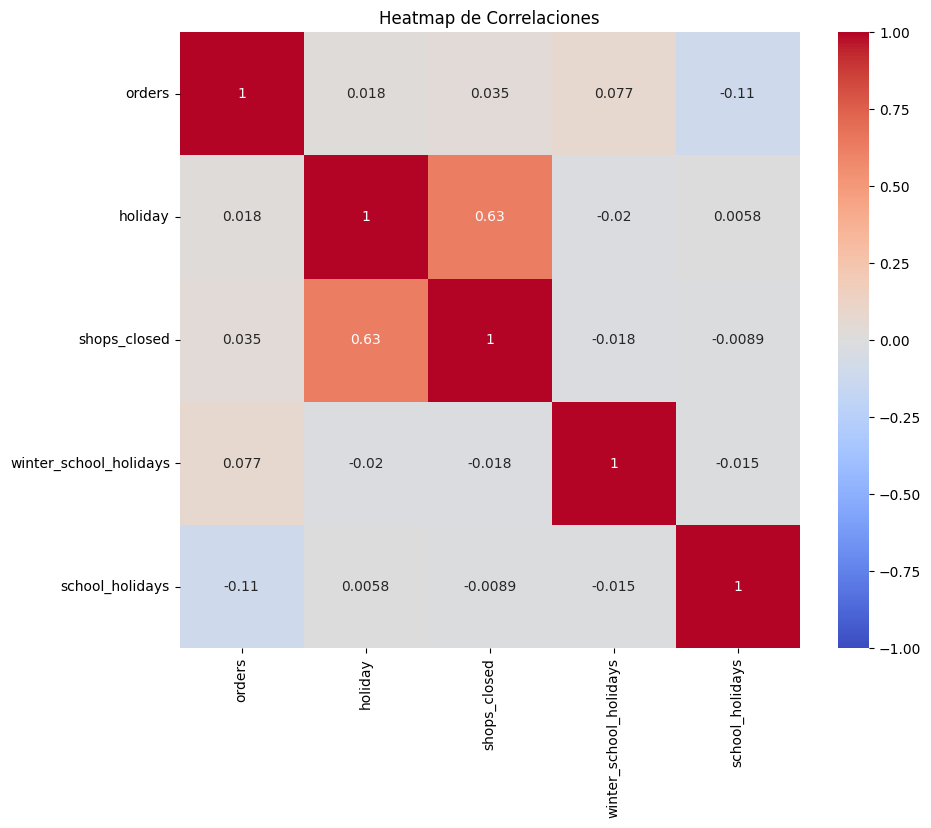

In [127]:
df_clean_numeric = df_clean.drop(columns=['warehouse', 'date', 'holiday_name'])

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

#### Dataset de (no) feriados

Otra distinción que tenemos es la de separar los días en si fueron feriado/vacaciones o no.

In [128]:
# Dividimos el dataset en los que son feriados/vacaciones y en los que no
df_holiday = df[df.holiday == 1]
df_no_holiday = df[df.holiday == 0]

Mostramos el Boxplot de cada uno

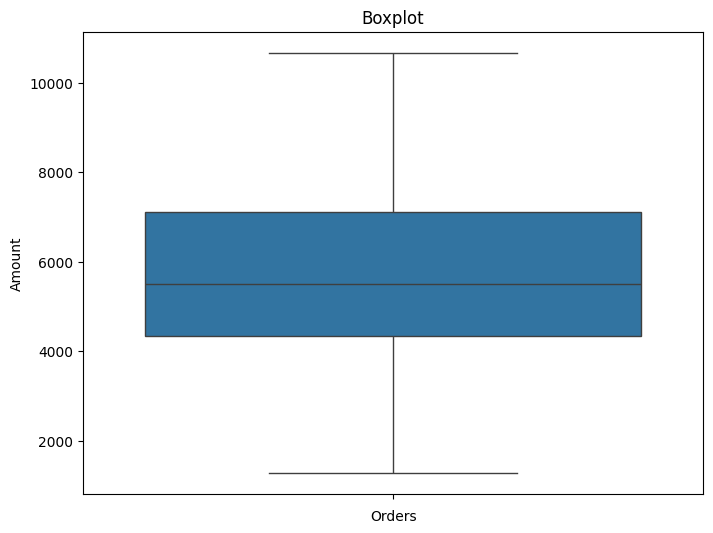

In [129]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df_holiday)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

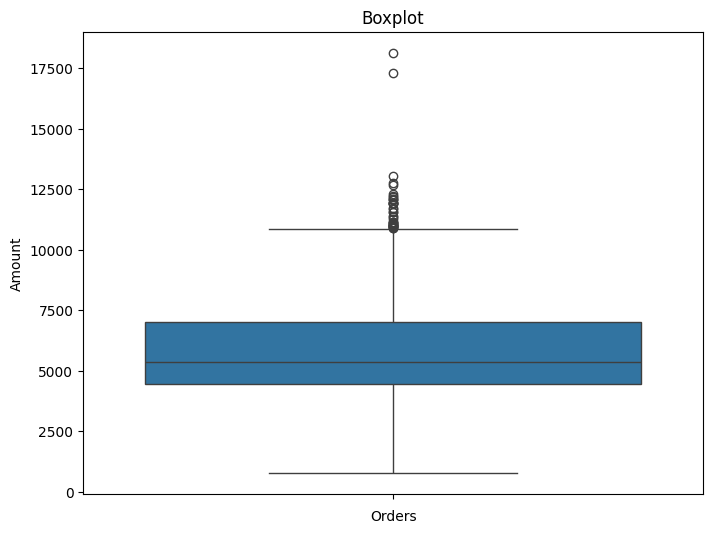

In [130]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df_no_holiday)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

#### Dataset de sucursales

Claramente la sucursal es un factor determinante en las muestras. Queremos ver que tanta correlacion tiene cada sucursal respecto al valor de la variable target. Para eso hacemos variables dummies con la columna warehouse y hacemos un heatmap de correlaciones.

In [131]:
df_warehouses = df_clean.drop(columns=["holiday", "holiday_name", 'date', "shops_closed", "school_holidays", "winter_school_holidays"])

# Primero agregamos las variables de las actividades de usuario para ver su correlacion

# user activity 1
df_usact1 = df[["user_activity_1"]]
df_usact1[["warehouse"]] = df_warehouses[["warehouse"]]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].mean().reset_index()
df_warehouses["user_activity_1"] = pd.merge(df_warehouses, df_usact1, on="warehouse", how="inner")["user_activity_1"]

# user activity 2
df_usact2 = df[["user_activity_2"]]
df_usact2[["warehouse"]] = df_warehouses[["warehouse"]]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].mean().reset_index()
df_warehouses["user_activity_2"] = pd.merge(df_warehouses, df_usact2, on="warehouse", how="inner")["user_activity_2"]
df_warehouses[["user_activity_1", "user_activity_2"]]

/tmp/ipykernel_10386/4236548369.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usact1[["warehouse"]] = df_warehouses[["warehouse"]]
/tmp/ipykernel_10386/4236548369.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usact2[["warehouse"]] = df_warehouses[["warehouse"]]


,user_activity_1,user_activity_2
0,1671.156748,36898.751048
1,1671.156748,36898.751048
2,1671.156748,36898.751048
3,1671.156748,36898.751048
4,1671.156748,36898.751048
...,...,...
7335,2989.061525,22173.545927
7336,2989.061525,22173.545927
7337,2989.061525,22173.545927
7338,2989.061525,22173.545927


In [132]:
# Reemplazamos warehouse por sus variables dummies a la vez que quitamos el resto de variables
df_warehouses = pd.concat([df_warehouses.drop(["warehouse"], axis=1), pd.get_dummies(df_warehouses.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_warehouses

,orders,user_activity_1,user_activity_2,warehouse_Brno_1,warehouse_Budapest_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,warehouse_Prague_2,warehouse_Prague_3
0,6895.0,1671.156748,36898.751048,0,0,0,0,1,0,0
1,6584.0,1671.156748,36898.751048,0,0,0,0,1,0,0
2,7030.0,1671.156748,36898.751048,0,0,0,0,1,0,0
3,6550.0,1671.156748,36898.751048,0,0,0,0,1,0,0
4,6910.0,1671.156748,36898.751048,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7335,6733.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7336,6492.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7337,6661.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7338,6843.0,2989.061525,22173.545927,0,1,0,0,0,0,0


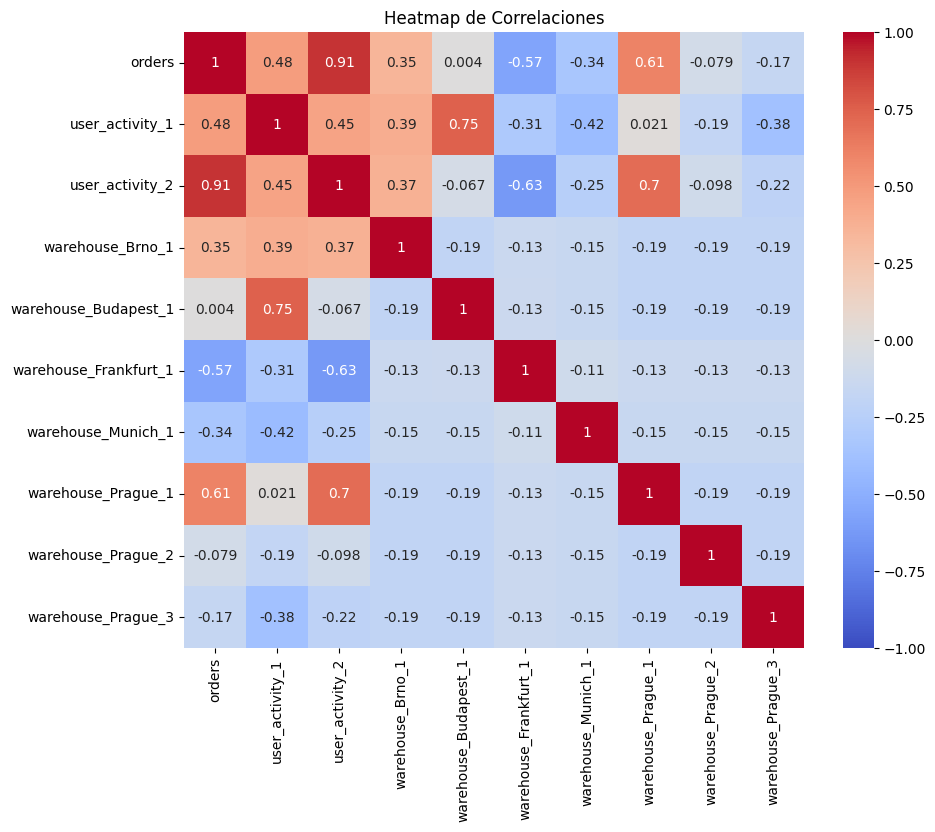

In [133]:
# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_warehouses.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

Notamos que hay mucha correlación entre las sucursales menos en tres (_warehouse Budapest 1_,  _warehouse Prague 2_ y _warehouse Prague 3_), por lo tanto dejamos esas variables como _other_

In [134]:
df_clean["warehouse"] = df_clean["warehouse"].apply(lambda x : "other" if x in ["Budapest_1", "Prague_2", "Prague_3"] else x)
df_clean.warehouse.value_counts()

warehouse
other          3540
Prague_1       1193
Brno_1         1193
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

#### Dataset dias de la semana

Así como debe haber diferencia entre la cantidad de pedidos por día y sucursales en los días feriados y en los no feriados, también debe haberlo entre los días de la semana.

In [135]:
orders_per_weekday = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 0, "Sunday": 0}
counts_per_weekday = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 0, "Sunday": 0}
orders_per_mounth = {"January": 0, "February": 0, "March": 0, "April": 0, "May": 0, "June": 0, "July": 0, "August": 0, "September": 0, "October": 0, "November": 0, "December": 0}
counts_per_mounth = {"January": 0, "February": 0, "March": 0, "April": 0, "May": 0, "June": 0, "July": 0, "August": 0, "September": 0, "October": 0, "November": 0, "December": 0}

def sum_orders_by_date(row):
    # pasar la fecha a datetime de pandas
    date = datetime.strptime(row["date"], "%Y-%m-%d")
    # tomar el dia de semana que cayo la fecha
    weekday = date.strftime("%A")
    mounth = date.strftime("%B")
    # sumar el numero de ordenes al dia de semana
    orders_per_weekday[weekday] += int(row["orders"])
    counts_per_weekday[weekday] += 1
    orders_per_mounth[mounth] += int(row["orders"])
    counts_per_mounth[mounth] += 1
    

df.apply(sum_orders_by_date, axis=1)

print(orders_per_weekday)
print(counts_per_weekday)
print(orders_per_mounth)
print(counts_per_mounth)

{'Monday': 5755543, 'Tuesday': 5739699, 'Wednesday': 5760388, 'Thursday': 5890880, 'Friday': 6488411, 'Saturday': 5934540, 'Sunday': 5060697}
{'Monday': 1060, 'Tuesday': 1085, 'Wednesday': 1094, 'Thursday': 1089, 'Friday': 1085, 'Saturday': 1085, 'Sunday': 842}
{'January': 4396433, 'February': 4099071, 'March': 3806561, 'April': 2984340, 'May': 2997021, 'June': 2837141, 'July': 2804372, 'August': 2870946, 'September': 3017584, 'October': 3234653, 'November': 3318637, 'December': 4263399}
{'January': 742, 'February': 694, 'March': 670, 'April': 535, 'May': 556, 'June': 546, 'July': 574, 'August': 580, 'September': 580, 'October': 587, 'November': 574, 'December': 702}


In [136]:
# Crear un DataFrame a partir de los diccionarios
weekdays = [weekday[0:3] for weekday in orders_per_weekday.keys()]
mean_per_weekday = [orders_per_weekday[weekday] / counts_per_weekday[weekday] for weekday in orders_per_weekday.keys()]
mounths = [mounth[0:3] for mounth in orders_per_mounth.keys()]
mean_per_mounth = [orders_per_mounth[mounth] / counts_per_mounth[mounth] for mounth in orders_per_mounth.keys()]

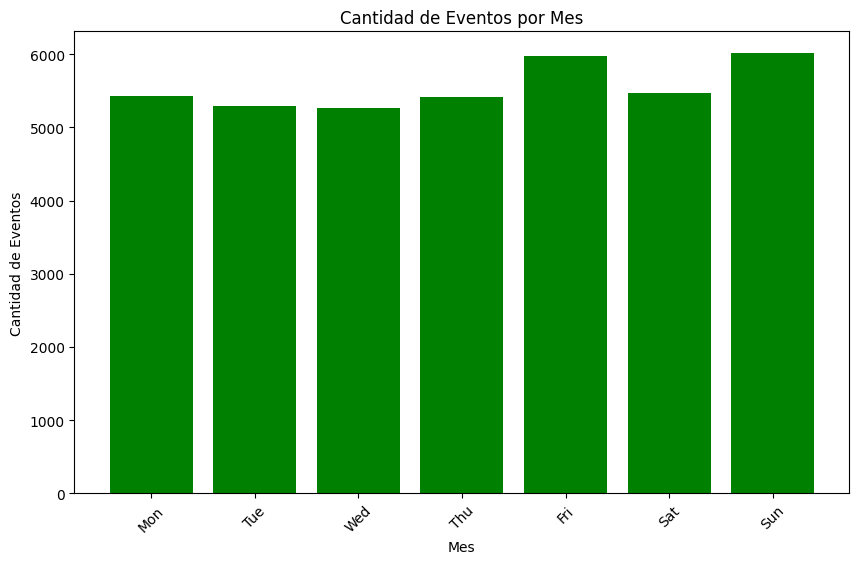

In [137]:
plt.figure(figsize=(10, 6))
plt.bar(weekdays, mean_per_weekday, color='green')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Eventos')
plt.title('Cantidad de Eventos por Mes')
plt.xticks(rotation=45)
plt.show()

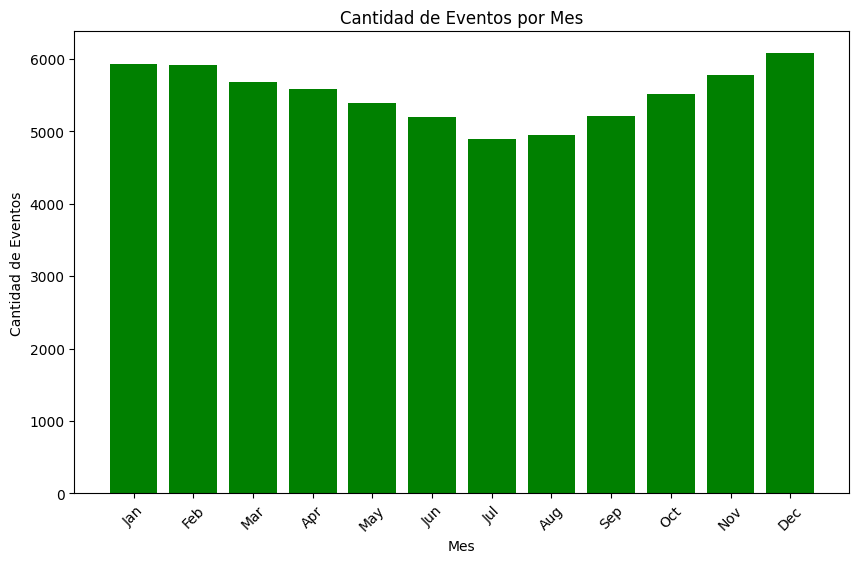

In [138]:
plt.figure(figsize=(10, 6))
plt.bar(mounths, mean_per_mounth, color='green')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Eventos')
plt.title('Cantidad de Eventos por Mes')
plt.xticks(rotation=45)
plt.show()

In [139]:
df_season = df_clean.copy()
df_season['fecha'] = pd.to_datetime(df['date'])

In [140]:
df_season["Season"] = df_season.fecha.dt.month_name()

In [141]:
def get_season(fecha):
    if fecha in ['December', 'January', 'February']:
        return 'Invierno'
    elif fecha in ['March', 'April', 'May']:
        return 'Primavera'
    elif fecha in ['June', 'July', 'August']:
        return 'Verano'
    elif fecha in ['September', 'October', 'November']:
        return 'Otoño'

In [142]:
df_season['Season'] = df_season.Season.apply(get_season)

In [143]:
df_seasons = pd.concat([df_clean['orders'], pd.get_dummies(df_season.Season).astype('int').add_prefix('Season_')], axis=1)

In [144]:
df_seasons

,orders,Season_Invierno,Season_Otoño,Season_Primavera,Season_Verano
0,6895.0,1,0,0,0
1,6584.0,1,0,0,0
2,7030.0,1,0,0,0
3,6550.0,1,0,0,0
4,6910.0,1,0,0,0
...,...,...,...,...,...
7335,6733.0,0,0,1,0
7336,6492.0,0,0,1,0
7337,6661.0,0,0,1,0
7338,6843.0,0,0,1,0


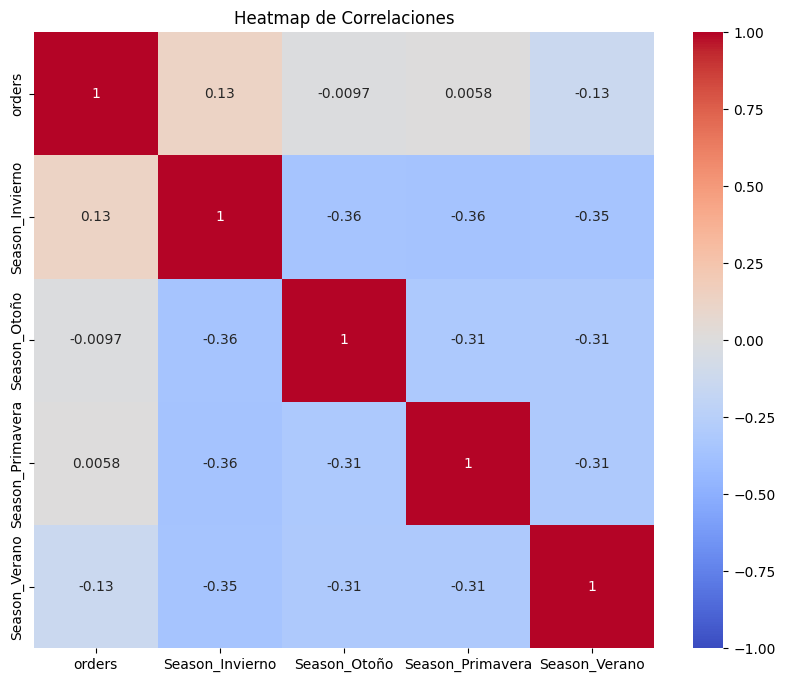

In [145]:
# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_seasons.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

In [146]:
df_season['Hot'] = df_season.Season.apply(lambda x: 1 if x in ['Verano', 'Primera'] else 0)

In [147]:
df_season

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,fecha,Season,Hot
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,2020-12-05,Invierno,0
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,2020-12-06,Invierno,0
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,2020-12-07,Invierno,0
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,2020-12-08,Invierno,0
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,2020-12-09,Invierno,0
...,...,...,...,...,...,...,...,...,...,...,...
7335,other,2024-03-10,6733.0,NaN,0,0,0,0,2024-03-10,Primavera,0
7336,other,2024-03-11,6492.0,NaN,0,0,0,0,2024-03-11,Primavera,0
7337,other,2024-03-12,6661.0,NaN,0,0,0,0,2024-03-12,Primavera,0
7338,other,2024-03-13,6843.0,NaN,0,0,0,0,2024-03-13,Primavera,0


In [148]:
df_season.orders.corr(df_season.Hot)

-0.13284735461473166

In [149]:
df[['orders', 'snow', 'precipitation']].corr()

,orders,snow,precipitation
orders,1.000000,0.093424,0.030428
snow,0.093424,1.000000,0.065120
precipitation,0.030428,0.065120,1.000000


In [150]:
df[['orders', 'holiday', 'mov_change']].corr()

,orders,holiday,mov_change
orders,1.000000,0.018006,-0.040215
holiday,0.018006,1.000000,0.014483
mov_change,-0.040215,0.014483,1.000000


## Conclusiones

- Nos vamos con Warehouse importantes: warehouse_Brno_1, warehouse_Budapest_1, warehouse_Frankfurt_1, warehouse_Munich_1, warehouse_Prague_1, warehouse_Prague_2	y warehouse_Prague_3
- User activities mucha correlación
- Promedio de User activities por warehouse
- Si la fecha pertenece a temporada de calor. En invierno se encuentran valores mas altos
- School holiday tiene correlacion ""alta"" y holidays no

Columnas finales:
- warehouse_Brno-1 (binaria)
- warehouse_Budapest_1 (binaria)
- warehouse_Frankfurt_1 (bianria)
- warehouse_Munich_1 (binaria)
- warehouse_Prague_1 (binaria)
- warehouse_Prague_2 (binaria)
- warehouse_Prague_3 (binaria)
- Promedio user activities por warehouse (numerica)
- school holiday (binaria)
- Hot season (binaria)

## Feature Engineer

In [151]:
df_final = df.drop(["shutdown", "mini_shutdown", "frankfurt_shutdown", "precipitation", "snow", "blackout", "mov_change", 'id'], axis = 1)
df_final

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,user_activity_1,user_activity_2
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,1722.0,32575.0
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,1688.0,32507.0
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,1696.0,32552.0
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,1681.0,32423.0
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,1704.0,32410.0
...,...,...,...,...,...,...,...,...,...,...
7335,Budapest_1,2024-03-10,6733.0,NaN,0,0,0,0,2983.0,27111.0
7336,Budapest_1,2024-03-11,6492.0,NaN,0,0,0,0,2975.0,27133.0
7337,Budapest_1,2024-03-12,6661.0,NaN,0,0,0,0,2974.0,27151.0
7338,Budapest_1,2024-03-13,6843.0,NaN,0,0,0,0,2979.0,27180.0


In [152]:
df_final['date'] = pd.to_datetime(df_final['date'])

In [153]:
df_final = df_final.sort_values(by = "date")

In [154]:
df_final_label = df_final.orders
df_final = df_final.drop(["orders"], axis=1)

# Separando el DataFrame en 80% y 20%
df_final_train, df_final_validation, df_final_train_label, df_final_validation_label = train_test_split(df_final,
                                                    df_final_label, 
                                                    test_size=0.2,
                                                    shuffle=False)

In [155]:
df_final_train

,warehouse,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,user_activity_1,user_activity_2
0,Prague_1,2020-12-05,NaN,0,0,0,0,1722.0,32575.0
2386,Prague_2,2020-12-05,NaN,0,0,0,0,1317.0,18462.0
3579,Prague_3,2020-12-05,NaN,0,0,0,0,964.0,17693.0
6186,Budapest_1,2020-12-05,NaN,0,0,0,0,3046.0,17840.0
1193,Brno_1,2020-12-05,NaN,0,0,0,0,2332.0,27392.0
...,...,...,...,...,...,...,...,...,...
971,Prague_1,2023-08-06,NaN,0,0,0,0,1657.0,36209.0
7124,Budapest_1,2023-08-06,NaN,0,0,0,0,2962.0,22432.0
3357,Prague_2,2023-08-06,NaN,0,0,0,0,1287.0,21491.0
4551,Prague_3,2023-08-07,NaN,0,0,0,0,950.0,19482.0


In [156]:
# user activity 1
df_usact1 = df_final_train[["user_activity_1", 'warehouse']]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].mean()
PROMEDIO_UA1 = df_usact1.mean()
means_ua1= df_usact1.to_dict()

In [157]:
# user activity 2
df_usact2 = df_final_train[["user_activity_2", 'warehouse']]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].mean()
PROMEDIO_UA2 = df_usact1.mean()
means_ua2= df_usact2.to_dict()

In [158]:
# df_final_train["user_activity_1"] = df_final_train.warehouse.apply(lambda x: means_ua1.get(x, PROMEDIO_UA1))
# df_final_train["user_activity_2"] = df_final_train.warehouse.apply(lambda x: means_ua2.get(x, PROMEDIO_UA2))

city_to_country = {
    'Munich_1': 'Germany',
    'Frankfurt_1': 'Germany',
    'Budapest_1': 'Hungary',
    'Brno_1': 'Czech Republic',
    'Prague_1': 'Czech Republic',
    'Prague_2': 'Czech Republic',
    'Prague_3': 'Czech Republic'
}

df_final_train['country'] = df_final_train['warehouse'].map(city_to_country)
df_final_train = pd.concat([df_final_train.drop(["country"], axis=1), pd.get_dummies(df_final_train.country).astype('int').add_prefix('country_')], axis=1)
df_final_train = pd.concat([df_final_train.drop(["warehouse"], axis=1), pd.get_dummies(df_final_train.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_final_train = df_final_train.drop(["warehouse_Budapest_1", "warehouse_Prague_2", "warehouse_Prague_3"], axis=1)
df_final_train['hot_season'] = df_final_train.date.apply(lambda x: 1 if 2 < x.month < 9 else 0)
# df_final_train = pd.concat([df_final_train.drop(["holiday_name"], axis=1), pd.get_dummies(df_final_train.holiday_name).astype('int').add_prefix('holiday_name_')], axis=1)


df_final_train['year'] = df_final_train['date'].dt.year
df_final_train['month'] = df_final_train['date'].dt.month
df_final_train['week'] = df_final_train['date'].dt.isocalendar().week
df_final_train['day'] = df_final_train['date'].dt.day
df_final_train['day_of_week'] = df_final_train['date'].dt.dayofweek #numero
# df_final_train['day_of_week'] = df_final_train['date'].dt.day_name() #cadena
df_final_train['year_sin'] = np.sin(2 * np.pi * df_final_train['year'])
df_final_train['year_cos'] = np.cos(2 * np.pi * df_final_train['year'])
df_final_train['month_sin'] = np.sin(2 * np.pi * df_final_train['month'] / 12) 
df_final_train['month_cos'] = np.cos(2 * np.pi * df_final_train['month'] / 12)
df_final_train['week_sin'] = np.sin(2 * np.pi * df_final_train['week'] / 53)
df_final_train['week_cos'] = np.cos(2 * np.pi * df_final_train['week'] / 53)
df_final_train['day_sin'] = np.sin(2 * np.pi * df_final_train['day'] / 31)
df_final_train['day_cos'] = np.cos(2 * np.pi * df_final_train['day'] / 31)
df_final_train['day_of_week_sin'] = np.sin(2 * np.pi * df_final_train['day_of_week'] / 7)
df_final_train['day_of_week_cos'] = np.cos(2 * np.pi * df_final_train['day_of_week'] / 7)
df_final_train["month_name"] = df_final_train.date.dt.month_name()
df_final_train['season'] = df_final_train.month_name.apply(get_season)
df_final_train = pd.concat([df_final_train, pd.get_dummies(df_final_train.season).astype('int').add_prefix('Season_')], axis=1)

df_final_train = df_final_train.drop(['date', 'year', 'month', 'week', 'day', 'day_of_week', 'month_name', 'season', 'holiday_name', 'user_activity_1', 'user_activity_2'], axis = 1)
df_final_train = df_final_train.reset_index().drop(["index"], axis = 1)

df_final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   holiday                 5872 non-null   int64  
 1   shops_closed            5872 non-null   int64  
 2   winter_school_holidays  5872 non-null   int64  
 3   school_holidays         5872 non-null   int64  
 4   country_Czech Republic  5872 non-null   int64  
 5   country_Germany         5872 non-null   int64  
 6   country_Hungary         5872 non-null   int64  
 7   warehouse_Brno_1        5872 non-null   int64  
 8   warehouse_Frankfurt_1   5872 non-null   int64  
 9   warehouse_Munich_1      5872 non-null   int64  
 10  warehouse_Prague_1      5872 non-null   int64  
 11  hot_season              5872 non-null   int64  
 12  year_sin                5872 non-null   float64
 13  year_cos                5872 non-null   float64
 14  month_sin               5872 non-null   

In [159]:
# df_final_validation["user_activity_1"] = df_final_validation.warehouse.apply(lambda x: means_ua1.get(x, PROMEDIO_UA1))
# df_final_validation["user_activity_2"] = df_final_validation.warehouse.apply(lambda x: means_ua2.get(x, PROMEDIO_UA2))

df_final_validation['country'] = df_final_validation['warehouse'].map(city_to_country)
df_final_validation = pd.concat([df_final_validation.drop(["country"], axis=1), pd.get_dummies(df_final_validation.country).astype('int').add_prefix('country_')], axis=1)
df_final_validation = pd.concat([df_final_validation.drop(["warehouse"], axis=1), pd.get_dummies(df_final_validation.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_final_validation = df_final_validation.drop(["warehouse_Budapest_1", "warehouse_Prague_2", "warehouse_Prague_3"], axis=1)
df_final_validation['hot_season'] = df_final_validation.date.apply(lambda x: 1 if 2 < x.month < 9 else 0)

df_final_validation['year'] = df_final_validation['date'].dt.year
df_final_validation['month'] = df_final_validation['date'].dt.month
df_final_validation['week'] = df_final_validation['date'].dt.isocalendar().week
df_final_validation['day'] = df_final_validation['date'].dt.day
df_final_validation['day_of_week'] = df_final_validation['date'].dt.dayofweek #numero
# df_final_validation['day_of_week'] = df_final_validation['date'].dt.day_name() #cadena
df_final_validation['year_sin'] = np.sin(2 * np.pi * df_final_validation['year'])
df_final_validation['year_cos'] = np.cos(2 * np.pi * df_final_validation['year'])
df_final_validation['month_sin'] = np.sin(2 * np.pi * df_final_validation['month'] / 12) 
df_final_validation['month_cos'] = np.cos(2 * np.pi * df_final_validation['month'] / 12)
df_final_validation['week_sin'] = np.sin(2 * np.pi * df_final_validation['week'] / 53)
df_final_validation['week_cos'] = np.cos(2 * np.pi * df_final_validation['week'] / 53)
df_final_validation['day_sin'] = np.sin(2 * np.pi * df_final_validation['day'] / 31)
df_final_validation['day_cos'] = np.cos(2 * np.pi * df_final_validation['day'] / 31)
df_final_validation['day_of_week_sin'] = np.sin(2 * np.pi * df_final_validation['day_of_week'] / 7)
df_final_validation['day_of_week_cos'] = np.cos(2 * np.pi * df_final_validation['day_of_week'] / 7)
df_final_validation["month_name"] = df_final_validation.date.dt.month_name()
df_final_validation['season'] = df_final_validation.month_name.apply(get_season)
df_final_validation = pd.concat([df_final_validation, pd.get_dummies(df_final_validation.season).astype('int').add_prefix('Season_')], axis=1)

df_final_validation = df_final_validation.drop(['date', 'year', 'month', 'week', 'day', 'day_of_week', 'month_name', 'season', 'holiday_name', 'user_activity_1', 'user_activity_2'], axis = 1)
df_final_validation = df_final_validation.reset_index().drop(["index"], axis = 1)

df_final_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   holiday                 1468 non-null   int64  
 1   shops_closed            1468 non-null   int64  
 2   winter_school_holidays  1468 non-null   int64  
 3   school_holidays         1468 non-null   int64  
 4   country_Czech Republic  1468 non-null   int64  
 5   country_Germany         1468 non-null   int64  
 6   country_Hungary         1468 non-null   int64  
 7   warehouse_Brno_1        1468 non-null   int64  
 8   warehouse_Frankfurt_1   1468 non-null   int64  
 9   warehouse_Munich_1      1468 non-null   int64  
 10  warehouse_Prague_1      1468 non-null   int64  
 11  hot_season              1468 non-null   int64  
 12  year_sin                1468 non-null   float64
 13  year_cos                1468 non-null   float64
 14  month_sin               1468 non-null   

In [160]:
df_final_train

,holiday,shops_closed,winter_school_holidays,school_holidays,country_Czech Republic,country_Germany,country_Hungary,warehouse_Brno_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,hot_season,year_sin,year_cos,month_sin,month_cos,week_sin,week_cos,day_sin,day_cos,day_of_week_sin,day_of_week_cos,Season_Invierno,Season_Otoño,Season_Primavera,Season_Verano
0,0,0,0,0,1,0,0,0,0,0,1,0,-8.073961e-13,1.0,-2.449294e-16,1.0,-0.456629,0.889657,0.848644,0.528964,-0.974928,-0.222521,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,-8.073961e-13,1.0,-2.449294e-16,1.0,-0.456629,0.889657,0.848644,0.528964,-0.974928,-0.222521,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,-8.073961e-13,1.0,-2.449294e-16,1.0,-0.456629,0.889657,0.848644,0.528964,-0.974928,-0.222521,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,-8.073961e-13,1.0,-2.449294e-16,1.0,-0.456629,0.889657,0.848644,0.528964,-0.974928,-0.222521,1,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,-8.073961e-13,1.0,-2.449294e-16,1.0,-0.456629,0.889657,0.848644,0.528964,-0.974928,-0.222521,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,0,0,0,0,1,0,0,0,0,0,1,1,-6.447061e-13,1.0,-8.660254e-01,-0.5,-0.508531,-0.861044,0.937752,0.347305,-0.781831,0.623490,0,0,0,1
5868,0,0,0,0,0,0,1,0,0,0,0,1,-6.447061e-13,1.0,-8.660254e-01,-0.5,-0.508531,-0.861044,0.937752,0.347305,-0.781831,0.623490,0,0,0,1
5869,0,0,0,0,1,0,0,0,0,0,0,1,-6.447061e-13,1.0,-8.660254e-01,-0.5,-0.508531,-0.861044,0.937752,0.347305,-0.781831,0.623490,0,0,0,1
5870,0,0,0,0,1,0,0,0,0,0,0,1,-6.447061e-13,1.0,-8.660254e-01,-0.5,-0.6068,-0.794854,0.988468,0.151428,0.000000,1.000000,0,0,0,1


In [161]:
df_final_validation

,holiday,shops_closed,winter_school_holidays,school_holidays,country_Czech Republic,country_Germany,country_Hungary,warehouse_Brno_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,hot_season,year_sin,year_cos,month_sin,month_cos,week_sin,week_cos,day_sin,day_cos,day_of_week_sin,day_of_week_cos,Season_Invierno,Season_Otoño,Season_Primavera,Season_Verano
0,0,0,0,0,1,0,0,0,0,0,0,1,-6.447061e-13,1.0,-0.866025,-5.000000e-01,-0.6068,-0.794854,0.988468,0.151428,0.000000,1.000000,0,0,0,1
1,0,0,0,0,1,0,0,1,0,0,0,1,-6.447061e-13,1.0,-0.866025,-5.000000e-01,-0.6068,-0.794854,0.988468,0.151428,0.000000,1.000000,0,0,0,1
2,0,0,0,0,0,1,0,0,1,0,0,1,-6.447061e-13,1.0,-0.866025,-5.000000e-01,-0.6068,-0.794854,0.988468,0.151428,0.000000,1.000000,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,1,1,-6.447061e-13,1.0,-0.866025,-5.000000e-01,-0.6068,-0.794854,0.988468,0.151428,0.000000,1.000000,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,0,1,-6.447061e-13,1.0,-0.866025,-5.000000e-01,-0.6068,-0.794854,0.988468,0.151428,0.000000,1.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0,0,0,0,1,0,0,1,0,0,0,1,1.585375e-14,1.0,1.000000,6.123234e-17,0.964636,0.263587,0.101168,-0.994869,-0.433884,-0.900969,0,0,1,0
1464,0,0,0,0,1,0,0,0,0,0,0,1,1.585375e-14,1.0,1.000000,6.123234e-17,0.964636,0.263587,0.101168,-0.994869,-0.433884,-0.900969,0,0,1,0
1465,0,0,0,0,1,0,0,0,0,0,1,1,1.585375e-14,1.0,1.000000,6.123234e-17,0.964636,0.263587,0.101168,-0.994869,-0.433884,-0.900969,0,0,1,0
1466,0,0,0,0,1,0,0,0,0,0,0,1,1.585375e-14,1.0,1.000000,6.123234e-17,0.964636,0.263587,0.101168,-0.994869,-0.433884,-0.900969,0,0,1,0


In [162]:
# Definir el orden de las columnas deseado
column_order = ['holiday', 'shops_closed', 'school_holidays', 'winter_school_holidays', 'country_Czech Republic', 'warehouse_Brno_1', 'country_Germany', 'country_Hungary', 'warehouse_Frankfurt_1', 'warehouse_Munich_1', 'warehouse_Prague_1', 'hot_season']


In [163]:
# Reordenar las columnas del DataFrame según el orden deseado
df_final_validation = df_final_validation[column_order]
df_final_train = df_final_train[column_order]


## XGboost

In [477]:
# Crear el regressor XGBoost
xgb_reg = xgb.XGBRegressor()

# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'max_depth': [2,3, 6, 9, 11, 13, 15],
    'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7, 1],
    'n_estimators': [50, 65, 80, 100, 200, 300],
    'colsample_bytree': [0.3, 0.6, 0.7, 1]
}

In [478]:
# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

In [479]:
# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(df_final_train, df_final_train_label)

Fitting 3 folds for each of 1008 candidates, totalling 3024 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.6, 0.7, 1],
                         'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7, 1],
                         'max_depth': [2, 3, 6, 9, 11, 13, 15],
                         'n_estimators': [50, 65, 80, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [483]:
# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejor combinación de hiperparámetros: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred = np.round(best_model.predict(df_final_validation))

# Evaluar el rendimiento del modelo
mse = mean_squared_error(df_final_validation_label, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mejor combinación de hiperparámetros: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300}
Mean Squared Error: 2252295.44


In [481]:
list(y_pred)

[4900.0,
 6788.0,
 1597.0,
 7884.0,
 5325.0,
 6788.0,
 1597.0,
 7884.0,
 4900.0,
 5325.0,
 3771.0,
 4527.0,
 7884.0,
 4527.0,
 3154.0,
 6788.0,
 5325.0,
 4900.0,
 1597.0,
 3154.0,
 5325.0,
 7884.0,
 4527.0,
 6788.0,
 1597.0,
 4900.0,
 4527.0,
 3154.0,
 1597.0,
 7884.0,
 5325.0,
 4900.0,
 6788.0,
 6788.0,
 4900.0,
 4527.0,
 7884.0,
 1597.0,
 3154.0,
 5325.0,
 7884.0,
 5325.0,
 6788.0,
 4527.0,
 4900.0,
 1597.0,
 7884.0,
 3154.0,
 4900.0,
 5325.0,
 4527.0,
 6788.0,
 1597.0,
 4527.0,
 4900.0,
 7884.0,
 6788.0,
 5325.0,
 3154.0,
 1597.0,
 4527.0,
 6788.0,
 7884.0,
 4900.0,
 5325.0,
 6788.0,
 3154.0,
 5325.0,
 4527.0,
 4900.0,
 1597.0,
 7884.0,
 6788.0,
 3154.0,
 5325.0,
 4527.0,
 7884.0,
 1597.0,
 4900.0,
 4527.0,
 6788.0,
 3154.0,
 5325.0,
 7884.0,
 1597.0,
 4900.0,
 4900.0,
 7884.0,
 6788.0,
 4527.0,
 1597.0,
 6788.0,
 4900.0,
 7884.0,
 3154.0,
 4527.0,
 5325.0,
 1597.0,
 5325.0,
 7884.0,
 4527.0,
 3154.0,
 4900.0,
 6788.0,
 4900.0,
 6788.0,
 4527.0,
 1597.0,
 3154.0,
 7884.0,
 5325.0,
 

In [482]:
df_final_validation_label

3358     5020.0
2165     7319.0
5999     1565.0
972      8455.0
7125     5607.0
         ...   
2385    10777.0
4771     6408.0
1192    11917.0
3578     7140.0
6185     1916.0
Name: orders, Length: 1468, dtype: float64

## Redes Neuronales

In [52]:
# Escalar los datos
scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(df_final_train)
df_validation_scaled = scaler.transform(df_final_validation)

Epoch 1/100
470/470 - 3s - loss: 29031000.0000 - val_loss: 19665202.0000 - 3s/epoch - 6ms/step
Epoch 2/100
470/470 - 1s - loss: 5364046.5000 - val_loss: 1561253.3750 - 1s/epoch - 3ms/step
Epoch 3/100
470/470 - 1s - loss: 545061.6250 - val_loss: 849799.4375 - 1s/epoch - 2ms/step
Epoch 4/100
470/470 - 1s - loss: 470121.8438 - val_loss: 765203.8750 - 1s/epoch - 2ms/step
Epoch 5/100
470/470 - 2s - loss: 463004.9062 - val_loss: 737642.1250 - 2s/epoch - 4ms/step
Epoch 6/100
470/470 - 2s - loss: 460473.1562 - val_loss: 717107.8125 - 2s/epoch - 4ms/step
Epoch 7/100
470/470 - 1s - loss: 457685.5938 - val_loss: 805745.2500 - 1s/epoch - 3ms/step
Epoch 8/100
470/470 - 2s - loss: 457056.5938 - val_loss: 728421.7500 - 2s/epoch - 3ms/step
Epoch 9/100
470/470 - 2s - loss: 456219.9375 - val_loss: 733124.6250 - 2s/epoch - 3ms/step
Epoch 10/100
470/470 - 2s - loss: 455859.8750 - val_loss: 707458.5625 - 2s/epoch - 3ms/step
Epoch 11/100
470/470 - 1s - loss: 453966.2812 - val_loss: 754447.5000 - 1s/epoch - 

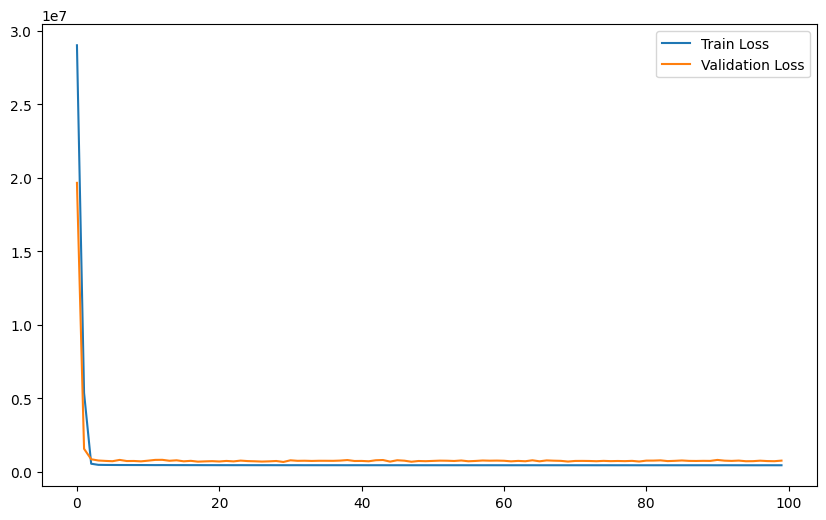

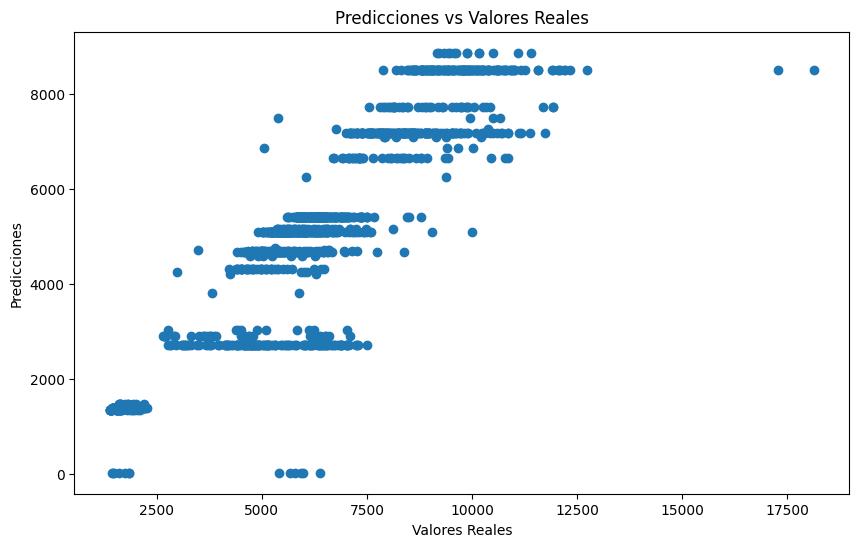

In [53]:
# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=df_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
history = model.fit(df_train_scaled, df_final_train_label, epochs=100, batch_size=10, verbose=2, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(df_validation_scaled, df_final_validation_label, verbose=2)
print(f'Test Loss: {loss}')

# Hacer predicciones
y_pred = model.predict(df_validation_scaled)

# Calcular el error
test_mse = mean_squared_error(df_final_validation_label, y_pred)
print(f'Test MSE: {test_mse}')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Graficar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(df_final_validation_label, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

## Modelo Random

In [164]:
model1 = XGBRegressor(random_state=42)
model2 = LGBMRegressor(random_state=42)
model3 = MLPRegressor(random_state=42)
model4 = RandomForestRegressor(random_state=42)
model5 = ExtraTreesRegressor(random_state=42)
model6 = SVR()
model7 = DecisionTreeRegressor(random_state=42)
model8 = AdaBoostRegressor(random_state=42)
model9 = ElasticNet()
model10 = CatBoostRegressor(random_state=42)
meta_model = GradientBoostingRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_meta_features = np.zeros((df_final_train.shape[0], 10))
test_meta_features = np.zeros((df_final_validation.shape[0], 10))

for train_index, val_index in kf.split(df_final_train):
    X_train_fold, X_val_fold = df_final_train.iloc[train_index], df_final_train.iloc[val_index]
    y_train_fold, y_val_fold = df_final_train_label.iloc[train_index], df_final_train_label.iloc[val_index]

    model1.fit(X_train_fold, y_train_fold)
    model2.fit(X_train_fold, y_train_fold)
    model3.fit(X_train_fold, y_train_fold)
    model4.fit(X_train_fold, y_train_fold)
    model5.fit(X_train_fold, y_train_fold)
    model6.fit(X_train_fold, y_train_fold)
    model7.fit(X_train_fold, y_train_fold)
    model8.fit(X_train_fold, y_train_fold)
    model9.fit(X_train_fold, y_train_fold)
    model10.fit(X_train_fold, y_train_fold)
    
    val_model1_pred = model1.predict(X_val_fold)
    val_model2_pred = model2.predict(X_val_fold)
    val_model3_pred = model3.predict(X_val_fold)
    val_model4_pred = model4.predict(X_val_fold)
    val_model5_pred = model5.predict(X_val_fold)
    val_model6_pred = model6.predict(X_val_fold)
    val_model7_pred = model7.predict(X_val_fold)
    val_model8_pred = model8.predict(X_val_fold)
    val_model9_pred = model9.predict(X_val_fold)
    val_model10_pred = model10.predict(X_val_fold)
    
    train_meta_features[val_index, 0] = val_model1_pred
    train_meta_features[val_index, 1] = val_model2_pred
    train_meta_features[val_index, 2] = val_model3_pred
    train_meta_features[val_index, 3] = val_model4_pred
    train_meta_features[val_index, 4] = val_model5_pred
    train_meta_features[val_index, 5] = val_model6_pred
    train_meta_features[val_index, 6] = val_model7_pred
    train_meta_features[val_index, 7] = val_model8_pred
    train_meta_features[val_index, 8] = val_model9_pred
    train_meta_features[val_index, 9] = val_model10_pred
    
    test_model1_pred = model1.predict(df_final_validation)
    test_model2_pred = model2.predict(df_final_validation)
    test_model3_pred = model3.predict(df_final_validation)
    test_model4_pred = model4.predict(df_final_validation)
    test_model5_pred = model5.predict(df_final_validation)
    test_model6_pred = model6.predict(df_final_validation)
    test_model7_pred = model7.predict(df_final_validation)
    test_model8_pred = model8.predict(df_final_validation)
    test_model9_pred = model9.predict(df_final_validation)
    test_model10_pred = model10.predict(df_final_validation)
    
    test_meta_features[:, 0] += test_model1_pred
    test_meta_features[:, 1] += test_model2_pred
    test_meta_features[:, 2] += test_model3_pred
    test_meta_features[:, 3] += test_model4_pred
    test_meta_features[:, 4] += test_model5_pred
    test_meta_features[:, 5] += test_model6_pred
    test_meta_features[:, 6] += test_model7_pred
    test_meta_features[:, 7] += test_model8_pred
    test_meta_features[:, 8] += test_model9_pred
    test_meta_features[:, 9] += test_model10_pred

test_meta_features /= kf.n_splits

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 4697, number of used features: 12
[LightGBM] [Info] Start training from score 5367.489887
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate set to 0.052279
0:	learn: 1974.0211029	total: 1.15ms	remaining: 1.15s
1:	learn: 1887.9174824	total: 10.1ms	remaining: 5.04s
2:	learn: 1805.9194683	total: 11.2ms	remaining: 3.71s
3:	learn: 1729.8826938	total: 13.2ms	remaining: 3.29s
4:	learn: 1658.5901584	total: 15.5ms	remaining: 3.08s
5:	learn: 1591.8099649	total: 17.7ms	remaining: 2.92s
6:	learn: 1525.7973812	total: 19.8ms	remaining: 2.81s
7:	learn: 1463.0981781	total: 42.5ms	remaining: 5.26s
8:	learn: 1403.8754960	total: 45.7ms	remaining: 5.03s
9:	learn: 1348.8687457	total: 55.6ms	remaining: 5.5s
10:	learn: 1300.7594529	total: 57.3ms	remaining: 5.15s
11:	learn: 1253.4380190	total: 58.9ms	remaining: 4.85s
12:	learn: 1209.4862465	total: 60.7ms	remaining: 4.61s
13:	learn: 1167.3689194	total: 64ms	remaining: 4.51s
14:	learn: 1128.2297905	total: 65.3ms	remaining: 4.29s
15:	learn: 1091.8524314	total: 66.6ms	remaining: 4.09s
16:	learn: 1058.0388833	total: 67.7ms	remaining: 3.91s
17:	learn: 1026.6302732	total: 68.9ms	remaining:

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate set to 0.052279
0:	learn: 1969.4781810	total: 895us	remaining: 894ms
1:	learn: 1883.8407037	total: 2.59ms	remaining: 1.29s
2:	learn: 1802.3044794	total: 3.56ms	remaining: 1.18s
3:	learn: 1726.7230616	total: 4.26ms	remaining: 1.06s
4:	learn: 1655.8704712	total: 4.93ms	remaining: 982ms
5:	learn: 1589.5153138	total: 5.67ms	remaining: 940ms
6:	learn: 1523.8530133	total: 6.89ms	remaining: 978ms
7:	learn: 1461.6099301	total: 8.27ms	remaining: 1.02s
8:	learn: 1402.8212260	total: 9.76ms	remaining: 1.07s
9:	learn: 1348.1807651	total: 12.1ms	remaining: 1.19s
10:	learn: 1300.4344053	total: 17.7ms	remaining: 1.59s
11:	learn: 1253.5223768	total: 20.2ms	remaining: 1.66s
12:	learn: 1209.9733226	total: 22.9ms	remaining: 1.74s
13:	learn: 1168.2303106	total: 25ms	remaining: 1.76s
14:	learn: 1129.3657397	total: 29ms	remaining: 1.9s
15:	learn: 1093.2546449	total: 32.1ms	remaining: 1.97s
16:	learn: 1059.7737001	total: 35.7ms	remaining: 2.06s
17:	learn: 1028.6179214	total: 38ms	remaining: 2.07

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate set to 0.052281
0:	learn: 1963.2870306	total: 1.74ms	remaining: 1.74s
1:	learn: 1878.1993418	total: 3.41ms	remaining: 1.7s
2:	learn: 1797.1566864	total: 5.27ms	remaining: 1.75s
3:	learn: 1722.1037116	total: 7.59ms	remaining: 1.89s
4:	learn: 1651.7597376	total: 9.95ms	remaining: 1.98s
5:	learn: 1585.8940727	total: 11.3ms	remaining: 1.86s
6:	learn: 1521.3768763	total: 13.1ms	remaining: 1.86s
7:	learn: 1459.6557420	total: 15.4ms	remaining: 1.91s
8:	learn: 1401.4470754	total: 17.6ms	remaining: 1.94s
9:	learn: 1347.2075035	total: 19.5ms	remaining: 1.93s
10:	learn: 1299.9236278	total: 21.6ms	remaining: 1.95s
11:	learn: 1253.5249489	total: 24.3ms	remaining: 2s
12:	learn: 1210.4282204	total: 26.2ms	remaining: 1.99s
13:	learn: 1169.1061853	total: 28.1ms	remaining: 1.98s
14:	learn: 1130.6181450	total: 30.1ms	remaining: 1.98s
15:	learn: 1094.8717025	total: 32.7ms	remaining: 2.01s
16:	learn: 1061.7677830	total: 34.4ms	remaining: 1.99s
17:	learn: 1030.8863608	total: 36.1ms	remaining: 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate set to 0.052281
0:	learn: 1953.5104356	total: 916us	remaining: 916ms
1:	learn: 1868.3797423	total: 2.07ms	remaining: 1.03s
2:	learn: 1787.2345294	total: 3.62ms	remaining: 1.2s
3:	learn: 1712.0716962	total: 4.49ms	remaining: 1.12s
4:	learn: 1641.6025909	total: 6.42ms	remaining: 1.28s
5:	learn: 1575.5977047	total: 7.21ms	remaining: 1.19s
6:	learn: 1510.4171807	total: 8.54ms	remaining: 1.21s
7:	learn: 1448.3369219	total: 11.2ms	remaining: 1.38s
8:	learn: 1389.7192044	total: 12.6ms	remaining: 1.38s
9:	learn: 1335.2494077	total: 19.1ms	remaining: 1.89s
10:	learn: 1287.7045266	total: 20.4ms	remaining: 1.83s
11:	learn: 1240.9235758	total: 21.8ms	remaining: 1.79s
12:	learn: 1197.4823345	total: 29.1ms	remaining: 2.21s
13:	learn: 1155.7592900	total: 37.3ms	remaining: 2.63s
14:	learn: 1116.9841858	total: 38.8ms	remaining: 2.55s
15:	learn: 1080.1845080	total: 40.3ms	remaining: 2.48s
16:	learn: 1046.6438375	total: 42.5ms	remaining: 2.46s
17:	learn: 1015.4759086	total: 44.4ms	remaining

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate set to 0.052281
0:	learn: 1975.6742577	total: 3.12ms	remaining: 3.12s
1:	learn: 1889.6797453	total: 10.9ms	remaining: 5.43s
2:	learn: 1807.8772677	total: 17.4ms	remaining: 5.79s
3:	learn: 1731.9683473	total: 20.6ms	remaining: 5.13s
4:	learn: 1660.8047886	total: 22.7ms	remaining: 4.53s
5:	learn: 1594.1544644	total: 26.5ms	remaining: 4.38s
6:	learn: 1528.3740537	total: 30.4ms	remaining: 4.31s
7:	learn: 1465.9906735	total: 33.6ms	remaining: 4.16s
8:	learn: 1407.1074125	total: 36.9ms	remaining: 4.06s
9:	learn: 1352.4085861	total: 39.9ms	remaining: 3.95s
10:	learn: 1304.4591698	total: 41.1ms	remaining: 3.69s
11:	learn: 1257.3853284	total: 42.4ms	remaining: 3.49s
12:	learn: 1213.6350335	total: 43.9ms	remaining: 3.33s
13:	learn: 1171.8305534	total: 45.3ms	remaining: 3.19s
14:	learn: 1132.9571535	total: 46.7ms	remaining: 3.07s
15:	learn: 1096.8420747	total: 47.9ms	remaining: 2.95s
16:	learn: 1063.3209543	total: 49.3ms	remaining: 2.85s
17:	learn: 1032.1973703	total: 51.5ms	remaini

In [165]:
meta_model.fit(train_meta_features, df_final_train_label)

final_pred = meta_model.predict(test_meta_features)

mape = mean_absolute_percentage_error(df_final_validation_label, final_pred)
print(f'Final Model MAPE: {mape:.4f}')

Final Model MAPE: 0.1731
